In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import the pakeges

In [2]:
data = pd.read_csv("Community.csv")
#load the data

In [15]:
data

,Unnamed: 0,Title,Url,Time,Content
0,0,China HITS BACK with 25 per cent LEVY on 106 U...,https://www.express.co.uk//news/world/941146/C...,20180404,GETTYChina hit USA with 25 per cent levy on ...
1,1,Easter Christian crackdown: China arrests wors...,https://www.express.co.uk//news/world/938961/e...,20180329,Authorities have imposed an effective ban C...
2,2,China in bid for CLOSER relations with Russia ...,https://www.express.co.uk//news/world/1016647/...,20180912,During a speech at the Easterm Economic For...
3,3,RBS may sell China stake,https://www.express.co.uk//finance/city/79143/...,20090109,None
4,4,China Belt and Road deal: New initiative could...,https://www.express.co.uk//news/world/1119268/...,20190426,var brightcoveBrandsafety='' Almost 40 wor...
5,5,World War 3: Seoul & China nuclear ambassadors...,https://www.express.co.uk//news/world/900204/w...,20180104,"Lee Do-hoon, the special representative for..."
6,6,"Wildlife heroes save nearly 4,000 endangered t...",https://www.express.co.uk//news/nature/589724/...,20150708,"PHHeroes rescued the 3,800 illegally harvest..."
7,7,Chinese security boss reveals AI could be used...,https://www.express.co.uk//news/world/857748/c...,20170923,GETTYChinese security boss to prevent terror...
8,8,Building for the future,https://www.express.co.uk//life-style/property...,20090220,None
9,9,Chinese President Xi Jinping reaches out to US...,https://www.express.co.uk//news/world/944105/u...,20180410,While most of the pledges were reiterations...


In [10]:
import calendar

In [11]:
neg = {}
pos = {}
neu = {}

In [16]:
data['Time']

0     20180404
1     20180329
2     20180912
3     20090109
4     20190426
5     20180104
6     20150708
7     20170923
8     20090220
9     20180410
10    20170916
11    20190424
12    20170511
13    20170117
14    20091018
15    20180712
16    20181227
17    20180726
18    20120327
19    20130428
20    20180505
21    20190115
22    20160930
23    20170111
24    20120424
25    20171005
26    20180216
27    20090422
28    20161214
29    20140315
        ...   
55    20130923
56    20111219
57    20170707
58    20180228
59    20180716
60    20170811
61    20160911
62    20160826
63    20110417
64    20110417
65    20170526
66    20171002
67    20170501
68    20170117
69    20170531
70    20120321
71    20190426
72    20180924
73    20171122
74    20180307
75    20180414
76    20181129
77    20171117
78    20190122
79    20150725
80    20190118
81    20160417
82    20190321
83    20171117
84    20090602
Name: Time, Length: 85, dtype: object

In [13]:
data['Time'][0].split()[-3]
#list(calendar.month_name).index(data['Time'][0].split()[-3])
timelist = list(calendar.month_name)
for i in range(len(timelist)):
    timelist[i] = timelist[i][0:3]

In [14]:
for i in range(len(data)):
    time = 0
    try:
        if data['Time'][i] != 'None':
            d1 = data['Time'][i].split()[-1]
            d2 = timelist.index(data['Time'][i].split()[-3])
            if int(d2) < 10:
                d2 = '0' + str(d2)
            d3 = data['Time'][i].split()[-2][:-1]
            if int(d3) < 10:
                d3 = '0' + str(d3)
            #print(d1,d2,d3)
            data['Time'][i] = int(d1 + str(d2) + str(d3))
    except BaseException:
        pass
        

/home/sunny/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

for i in range(len(data)):
    ss = sid.polarity_scores(data['Content'][i])
    T = data['Time'][i]
    if T != 'None':
        neg[str(T)] = ss['neg']
        pos[str(T)] = ss['pos']
        neu[str(T)] = ss['neu']
    else:
        neg[str(0)] = ss['neg']
        pos[str(0)] = ss['pos']
        neu[str(0)] = ss['neu']

In [18]:
pos = sorted(pos.items(), key = lambda k:k[0])
neg = sorted(neg.items(), key = lambda k:k[0])
neu = sorted(neu.items(), key = lambda k:k[0])

In [19]:
def Process(L):
    List = [[],[]]
    stime = int(L[0][0]) // 100 * 100
    ntime = stime + 100
    sum = 0
    count = 0
    for a in L:
        t = int(a[0])
        k = t//100 - stime//100
        if t >= ntime:
            List[0].append(stime/10000)
            List[1].append(sum/count)
            stime = stime + 100*k
            ntime = ntime + 100*k
            count = 0
            sum = 0
        if t >= stime and t <= ntime:
            sum = sum + a[1]
            count = count + 1
    l = {
    'index' : [],
    'time' : [],
    'value' : []
    }
    c = 0
    for i in range(len(List[0]) - 1):
        if List[0][i+1] - List[0][i] != 0.01 and int(List[0][i+1]) == int(List[0][i]):
            n = List[0][i+1]*100 - List[0][i]*100 - 1
            n = int(n)
            if n > 0:
                for j in range(n):
                    c = c + 1
                    l['index'].append(c + i)
                    l['time'].append(List[0][i] + 0.01*(j+1))
                    l['value'].append((List[1][i] + List[1][i+1])/2)
    for i in range(len(l['index'])):
        List[0].insert(l['index'][i],l['time'][i])
        List[1].insert(l['index'][i],l['value'][i])
    return List

In [20]:
Pos = Process(pos)
for i in range(len(Pos[0])):
    Pos[0][i] = str(Pos[0][i])
    if Pos[0][i][-2] == '.':
        Pos[0][i] = Pos[0][i] + '0'
    Pos[0][i] = Pos[0][i][2:]
    if Pos[0][i][-2] == '0':
        Pos[0][i] = Pos[0][i][:-2] + Pos[0][i][-1]

In [21]:
Pos[0][1]

'09.1'

In [25]:
Neg = Process(neg)
for i in range(len(Neg[0])):
    Neg[0][i] = str(Neg[0][i])
Neg[0][30]

'2013.06'

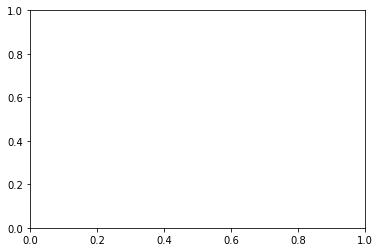

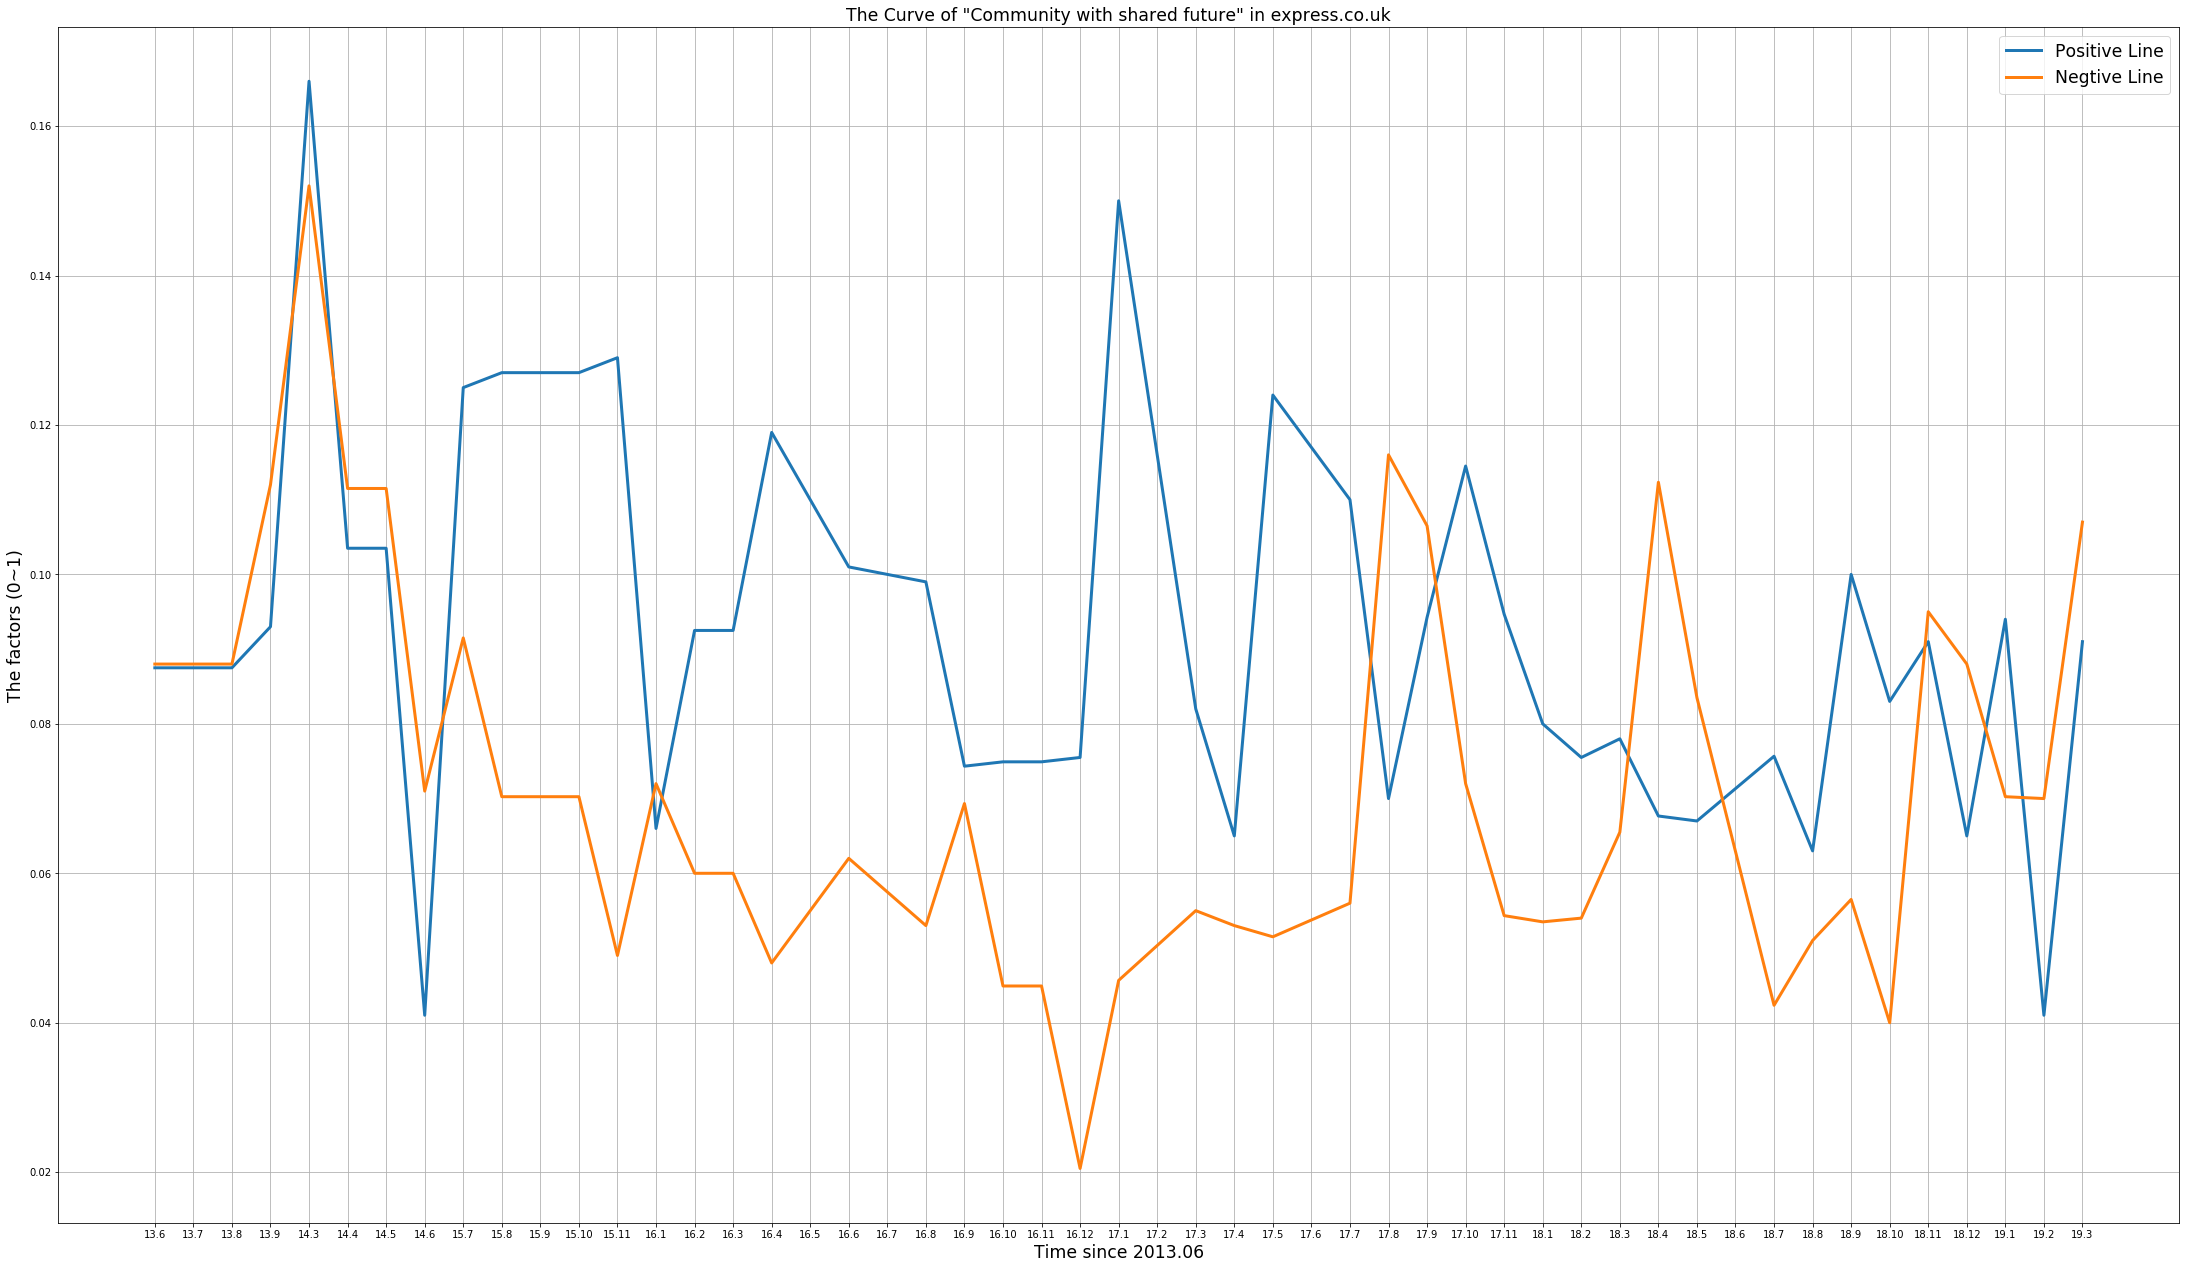

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()
x1 = np.arange(0,len(Pos[0][30:]))
y1 = Pos[1][30:]
x2 = np.arange(0,len(Neg[0][30:]))
y2 = Neg[1][30:]

group_labels = Pos[0][30:]

plt.figure(figsize=(38, 22))
plt.plot(x1,y1,lw = 3)
plt.plot(x2,y2,lw = 3)
plt.legend(['Positive Line','Negtive Line'],fontsize = 'xx-large')
my_x_ticks = np.arange(0, len(Pos[0][30:]))
plt.xticks(my_x_ticks, group_labels, rotation=0)
plt.grid()
plt.title('The Curve of "Community with shared future" in express.co.uk',fontsize = 'xx-large')
plt.xlabel('Time since 2013.06',fontsize = 'xx-large')
plt.ylabel('The factors (0~1)',fontsize = 'xx-large')
plt.savefig('Community.jpg')
plt.show()

In [106]:
group_labels

['14.8',
 '15.2',
 '16.3',
 '17.1',
 '17.2',
 '17.3',
 '17.4',
 '17.5',
 '17.6',
 '17.7',
 '17.8',
 '17.9',
 '17.10',
 '17.11',
 '17.12',
 '18.1',
 '18.2',
 '18.3',
 '18.4',
 '18.5',
 '18.6',
 '18.7',
 '18.8',
 '18.9',
 '18.10',
 '18.11',
 '18.12',
 '19.1',
 '19.2',
 '19.3',
 '19.4']

In [27]:
posindex = np.sum(y1)/len(y1)

negindex = np.sum(y2)/len(y2)

posindex,negindex

(0.09342647058823532, 0.0703202614379085)